In [9]:
!pip install pywavelet
!pip install matplotlib
!pip install opencv-python
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

In [11]:
def display_img(img,title='untitled'):
    if(img.dtype != np.uint8):
        img = cv2.normalize(img, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1) # To convert floating type images to uint8
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print('done')

In [12]:


# def _wavelets_per_axis(wavelet, axes):
#     """Initialize Wavelets for each axis to be transformed.

#     Parameters
#     ----------
#     wavelet : Wavelet or tuple of Wavelets
#         If a single Wavelet is provided, it will used for all axes.  Otherwise
#         one Wavelet per axis must be provided.
#     axes : list
#         The tuple of axes to be transformed.

#     Returns
#     -------
#     wavelets : list of Wavelet objects
#         A tuple of Wavelets equal in length to ``axes``.

#     """
#     axes = tuple(axes)
#     if isinstance(wavelet, (str, Wavelet)):
#         # same wavelet on all axes
#         wavelets = [_as_wavelet(wavelet), ] * len(axes)
#     elif isinstance(wavelet, Iterable):
#         # (potentially) unique wavelet per axis (e.g. for dual-tree DWT)
#         if len(wavelet) == 1:
#             wavelets = [_as_wavelet(wavelet[0]), ] * len(axes)
#         else:
#             if len(wavelet) != len(axes):
#                 raise ValueError((
#                     "The number of wavelets must match the number of axes "
#                     "to be transformed."))
#             wavelets = [_as_wavelet(w) for w in wavelet]
#     else:
#         raise ValueError("wavelet must be a str, Wavelet or iterable")
#     return wavelets


# def _modes_per_axis(modes, axes):
#     """Initialize mode for each axis to be transformed.

#     Parameters
#     ----------
#     modes : str or tuple of strings
#         If a single mode is provided, it will used for all axes.  Otherwise
#         one mode per axis must be provided.
#     axes : tuple
#         The tuple of axes to be transformed.

#     Returns
#     -------
#     modes : tuple of int
#         A tuple of Modes equal in length to ``axes``.

#     """
#     axes = tuple(axes)
#     if isinstance(modes, (int, str)):
#         # same wavelet on all axes
#         modes = [Modes.from_object(modes), ] * len(axes)
#     elif isinstance(modes, Iterable):
#         if len(modes) == 1:
#             modes = [Modes.from_object(modes[0]), ] * len(axes)
#         else:
#             # (potentially) unique wavelet per axis (e.g. for dual-tree DWT)
#             if len(modes) != len(axes):
#                 raise ValueError(("The number of modes must match the number "
#                                   "of axes to be transformed."))
#         modes = [Modes.from_object(mode) for mode in modes]
#     else:
#         raise ValueError("modes must be a str, Mode enum or iterable")
#     return modes
    
# def dwtn(data, wavelet, mode='symmetric', axes=None):
#     """
#     Single-level n-dimensional Discrete Wavelet Transform.

#     Parameters
#     ----------
#     data : array_like
#         n-dimensional array with input data.
#     wavelet : Wavelet object or name string, or tuple of wavelets
#         Wavelet to use.  This can also be a tuple containing a wavelet to
#         apply along each axis in ``axes``.
#     mode : str or tuple of string, optional
#         Signal extension mode used in the decomposition,
#         see :ref:`Modes <ref-modes>`. This can also be a tuple of modes
#         specifying the mode to use on each axis in ``axes``.
#     axes : sequence of ints, optional
#         Axes over which to compute the DWT. Repeated elements mean the DWT will
#         be performed multiple times along these axes. A value of ``None`` (the
#         default) selects all axes.

#         Axes may be repeated, but information about the original size may be
#         lost if it is not divisible by ``2 ** nrepeats``. The reconstruction
#         will be larger, with additional values derived according to the
#         ``mode`` parameter. ``pywt.wavedecn`` should be used for multilevel
#         decomposition.

#     Returns
#     -------
#     coeffs : dict
#         Results are arranged in a dictionary, where key specifies
#         the transform type on each dimension and value is a n-dimensional
#         coefficients array.

#         For example, for a 2D case the result will look something like this::

#             {'aa': <coeffs>  # A(LL) - approx. on 1st dim, approx. on 2nd dim
#              'ad': <coeffs>  # V(LH) - approx. on 1st dim, det. on 2nd dim
#              'da': <coeffs>  # H(HL) - det. on 1st dim, approx. on 2nd dim
#              'dd': <coeffs>  # D(HH) - det. on 1st dim, det. on 2nd dim
#             }

#         For user-specified ``axes``, the order of the characters in the
#         dictionary keys map to the specified ``axes``.

#     """
#     data = np.asarray(data)
#     if not _have_c99_complex and np.iscomplexobj(data):
#         real = dwtn(data.real, wavelet, mode, axes)
#         imag = dwtn(data.imag, wavelet, mode, axes)
#         return dict((k, real[k] + 1j * imag[k]) for k in real.keys())

#     if data.dtype == np.dtype('object'):
#         raise TypeError("Input must be a numeric array-like")
#     if data.ndim < 1:
#         raise ValueError("Input data must be at least 1D")

#     if axes is None:
#         axes = range(data.ndim)
#     axes = [a + data.ndim if a < 0 else a for a in axes]

#     modes = _modes_per_axis(mode, axes)
#     wavelets = _wavelets_per_axis(wavelet, axes)

#     coeffs = [('', data)]
#     for axis, wav, mode in zip(axes, wavelets, modes):
#         new_coeffs = []
#         for subband, x in coeffs:
#             cA, cD = dwt_axis(x, wav, mode, axis)
#             new_coeffs.extend([(subband + 'a', cA),
#                                (subband + 'd', cD)])
#         coeffs = new_coeffs
#     return dict(coeffs)


# def idwtn(coeffs, wavelet, mode='symmetric', axes=None):
#     """
#     Single-level n-dimensional Inverse Discrete Wavelet Transform.

#     Parameters
#     ----------
#     coeffs: dict
#         Dictionary as in output of ``dwtn``. Missing or ``None`` items
#         will be treated as zeros.
#     wavelet : Wavelet object or name string, or tuple of wavelets
#         Wavelet to use.  This can also be a tuple containing a wavelet to
#         apply along each axis in ``axes``.
#     mode : str or list of string, optional
#         Signal extension mode used in the decomposition,
#         see :ref:`Modes <ref-modes>`. This can also be a tuple of modes
#         specifying the mode to use on each axis in ``axes``.
#     axes : sequence of ints, optional
#         Axes over which to compute the IDWT. Repeated elements mean the IDWT
#         will be performed multiple times along these axes. A value of ``None``
#         (the default) selects all axes.

#         For the most accurate reconstruction, the axes should be provided in
#         the same order as they were provided to ``dwtn``.

#     Returns
#     -------
#     data: ndarray
#         Original signal reconstructed from input data.

#     """

#     # drop the keys corresponding to value = None
#     coeffs = dict((k, v) for k, v in coeffs.items() if v is not None)

#     # drop the keys corresponding to value = None
#     coeffs = dict((k, v) for k, v in coeffs.items() if v is not None)

#     # Raise error for invalid key combinations
#     coeffs = _fix_coeffs(coeffs)

#     if (not _have_c99_complex and
#             any(np.iscomplexobj(v) for v in coeffs.values())):
#         real_coeffs = dict((k, v.real) for k, v in coeffs.items())
#         imag_coeffs = dict((k, v.imag) for k, v in coeffs.items())
#         return (idwtn(real_coeffs, wavelet, mode, axes) +
#                 1j * idwtn(imag_coeffs, wavelet, mode, axes))

#     # key length matches the number of axes transformed
#     ndim_transform = max(len(key) for key in coeffs.keys())

#     try:
#         coeff_shapes = (v.shape for k, v in coeffs.items()
#                         if v is not None and len(k) == ndim_transform)
#         coeff_shape = next(coeff_shapes)
#     except StopIteration:
#         raise ValueError("`coeffs` must contain at least one non-null wavelet "
#                          "band")
#     if any(s != coeff_shape for s in coeff_shapes):
#         raise ValueError("`coeffs` must all be of equal size (or None)")

#     if axes is None:
#         axes = range(ndim_transform)
#         ndim = ndim_transform
#     else:
#         ndim = len(coeff_shape)
#     axes = [a + ndim if a < 0 else a for a in axes]

#     modes = _modes_per_axis(mode, axes)
#     wavelets = _wavelets_per_axis(wavelet, axes)
#     for key_length, (axis, wav, mode) in reversed(
#             list(enumerate(zip(axes, wavelets, modes)))):
#         if axis < 0 or axis >= ndim:
#             raise np.AxisError("Axis greater than data dimensions")

#         new_coeffs = {}
#         new_keys = [''.join(coef) for coef in product('ad', repeat=key_length)]

#         for key in new_keys:
#             L = coeffs.get(key + 'a', None)
#             H = coeffs.get(key + 'd', None)
#             if L is not None and H is not None:
#                 if L.dtype != H.dtype:
#                     # upcast to a common dtype (float64 or complex128)
#                     if L.dtype.kind == 'c' or H.dtype.kind == 'c':
#                         dtype = np.complex128
#                     else:
#                         dtype = np.float64
#                     L = np.asarray(L, dtype=dtype)
#                     H = np.asarray(H, dtype=dtype)
#             new_coeffs[key] = idwt_axis(L, H, wav, mode, axis)
#         coeffs = new_coeffs

#     return coeffs['']
    
# def dwt2(data, wavelet, mode='symmetric', axes=(-2, -1)):
#     """
#     2D Discrete Wavelet Transform.

#     Parameters
#     ----------
#     data : array_like
#         2D array with input data
#     wavelet : Wavelet object or name string, or 2-tuple of wavelets
#         Wavelet to use.  This can also be a tuple containing a wavelet to
#         apply along each axis in ``axes``.
#     mode : str or 2-tuple of strings, optional
#         Signal extension mode, see :ref:`Modes <ref-modes>`. This can
#         also be a tuple of modes specifying the mode to use on each axis in
#         ``axes``.
#     axes : 2-tuple of ints, optional
#         Axes over which to compute the DWT. Repeated elements mean the DWT will
#         be performed multiple times along these axes.

#     Returns
#     -------
#     (cA, (cH, cV, cD)) : tuple
#         Approximation, horizontal detail, vertical detail and diagonal
#         detail coefficients respectively.  Horizontal refers to array axis 0
#         (or ``axes[0]`` for user-specified ``axes``).
#     """

#     axes = tuple(axes)
#     data = np.asarray(data)
#     if len(axes) != 2:
#         raise ValueError("Expected 2 axes")
#     if data.ndim < len(np.unique(axes)):
#         raise ValueError("Input array has fewer dimensions than the specified "
#                          "axes")

#     coefs = dwtn(data, wavelet, mode, axes)
#     return coefs['aa'], (coefs['da'], coefs['ad'], coefs['dd'])


# def idwt2(coeffs, wavelet, mode='symmetric', axes=(-2, -1)):
#     """
#     2-D Inverse Discrete Wavelet Transform.

#     Reconstructs data from coefficient arrays.

#     Parameters
#     ----------
#     coeffs : tuple
#         (cA, (cH, cV, cD)) A tuple with approximation coefficients and three
#         details coefficients 2D arrays like from ``dwt2``.  If any of these
#         components are set to ``None``, it will be treated as zeros.
#     wavelet : Wavelet object or name string, or 2-tuple of wavelets
#         Wavelet to use.  This can also be a tuple containing a wavelet to
#         apply along each axis in ``axes``.
#     mode : str or 2-tuple of strings, optional
#         Signal extension mode, see :ref:`Modes <ref-modes>`. This can
#         also be a tuple of modes specifying the mode to use on each axis in
#         ``axes``.
#     axes : 2-tuple of ints, optional
#         Axes over which to compute the IDWT. Repeated elements mean the IDWT
#         will be performed multiple times along these axes.

#     Examples
#     --------
#     >>> import numpy as np
#     >>> import pywt
#     >>> data = np.array([[1,2], [3,4]], dtype=np.float64)
#     >>> coeffs = pywt.dwt2(data, 'haar')
#     >>> pywt.idwt2(coeffs, 'haar')
#     array([[ 1.,  2.],
#            [ 3.,  4.]])

#     """
#     # L -low-pass data, H - high-pass data
#     LL, (HL, LH, HH) = coeffs
#     axes = tuple(axes)
#     if len(axes) != 2:
#         raise ValueError("Expected 2 axes")

#     coeffs = {'aa': LL, 'da': HL, 'ad': LH, 'dd': HH}
#     return idwtn(coeffs, wavelet, mode, axes)



In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_img(img, title='untitled'):
    if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
    print('done')

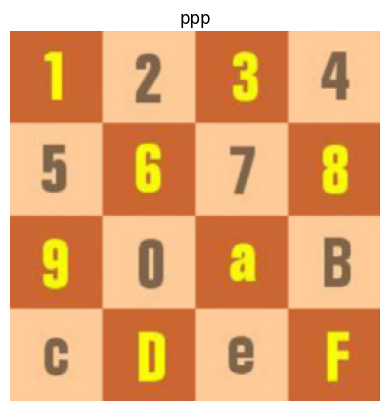

done


In [14]:
cover_img = cv2.resize(cv2.imread('cover_image_paper.png'), (256,256))
payload_img = cv2.resize(cv2.imread('payload_image_paper.png'), (256,256))
display_img(cover_img,'ppp')

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
 # Replace with the path to your image
def plt_rbg(cover_img):
    # Scale the pixel values to the valid range for the image type
    cover_img_scaled = cv2.normalize(cover_img, None, 0, 255, cv2.NORM_MINMAX)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(cover_img_scaled.astype(np.uint8), cv2.COLOR_BGR2RGB)

    # Separate the channels
    red_channel = image_rgb[:, :, 0]
    green_channel = image_rgb[:, :, 1]
    blue_channel = image_rgb[:, :, 2]

    # Plot histograms
    plt.figure(figsize=(12, 6))

    # Red channel histogram
    plt.subplot(131)
    plt.hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Green channel histogram
    plt.subplot(132)
    plt.hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Blue channel histogram
    plt.subplot(133)
    plt.hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



float64


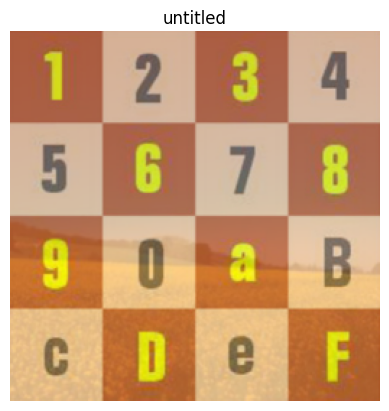

done


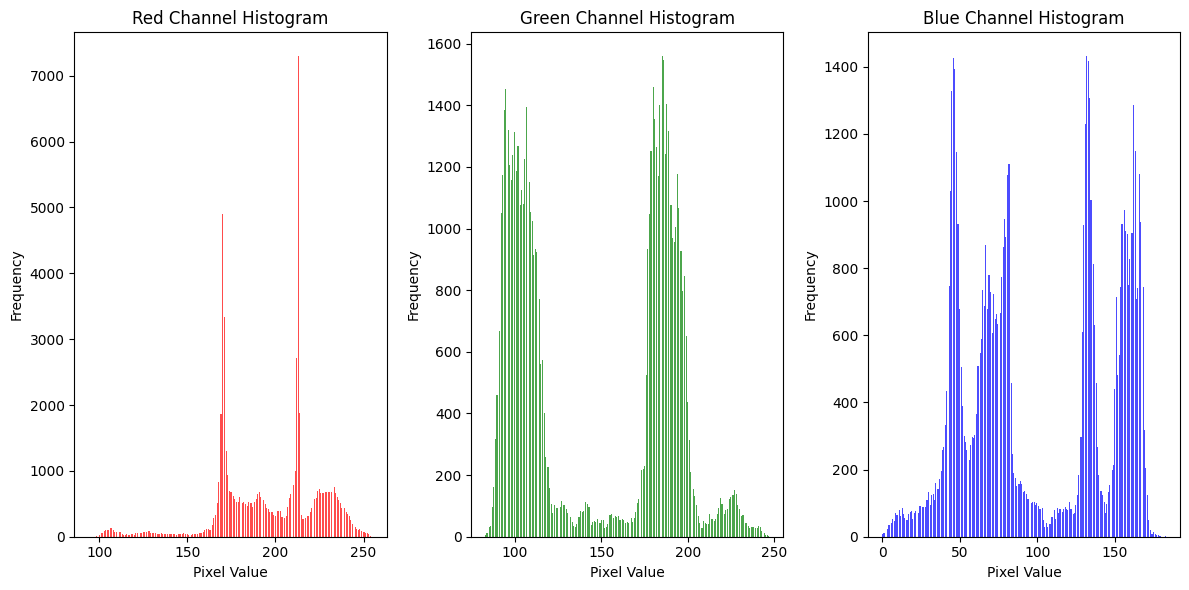

In [16]:
wavelet = 'haar'

## Cover Image Pre-processing

# Convert to Floating Type
cover_imgf = cover_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(cover_imgf)
separated_components_c = separated_components

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_cover = []
for i in range(3):
    frequency_components_cover.append(pywt.dwt2(normalized_components[i], wavelet))

## Payload Image Pre-processing

# Convert to Floating Type
payload_imgf = payload_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(payload_imgf)

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_payload = []
for i in range(3):
    frequency_components_payload.append(pywt.dwt2(normalized_components[i], wavelet))

a = 0.2
frequency_fused_components = []
cc = frequency_components_cover
cp = frequency_components_payload
cs = []
for i in range(3):
    # Fusion process using weighted combination of coefficients
    cA_fused = cc[i][0] + a * (cp[i][0])
    cH_fused = cc[i][1][0] + a * (cp[i][1][0])
    cV_fused = cc[i][1][1] + a * (cp[i][1][1])
    cD_fused = cc[i][1][2] + a * (cp[i][1][2])

    # Append the tuple of approximation and details coefficients
    cs.append((cA_fused, (cH_fused, cV_fused, cD_fused)))
    
# Perform inverse DWT
fused_image_components = []
for i in range(3):
    fused_image_components.append(pywt.idwt2(cs[i], wavelet))

stego_img = cv2.merge((
    (fused_image_components[0] * np.max(separated_components_c[0])),
    (fused_image_components[1] * np.max(separated_components_c[1])),
    (fused_image_components[2] * np.max(separated_components_c[2]))
))

stego_img = cv2.merge((
    (fused_image_components[0] * 255),
    (fused_image_components[1] * 255),
    (fused_image_components[2] * 255),
))

print(stego_img.dtype)
display_img(stego_img)
plt_rbg(stego_img)

In [17]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

class Metrics:
    def __init__(self):
        pass
    
    def mse(self, img1, img2):
        """
        Mean Squared Error (MSE) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            MSE value.
        """
        return np.mean((img1 - img2) ** 2)

    def snr(self, img1, img2):
        """
        Signal-to-Noise Ratio (SNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SNR value.
        """
        signal = np.sum(img1 ** 2)
        noise = np.sum((img1 - img2) ** 2)
        return 10 * np.log10(signal / noise)

    def psnr(self, img1, img2):
        """
        Peak Signal-to-Noise Ratio (PSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            PSNR value.
        """
        mse = self.mse(img1, img2)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def nvf(self, img1, img2):
        """
        Normalized Vertical Fingerprint (NVF) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            NVF value.
        """
        # Compute NVF using vertical fingerprint approach
        v_fingerprint1 = np.mean(np.abs(np.diff(img1, axis=0)))
        v_fingerprint2 = np.mean(np.abs(np.diff(img2, axis=0)))
        return v_fingerprint2 / v_fingerprint1

    def wpsnr(self, img1, img2):
        """
        Weighted Peak Signal-to-Noise Ratio (WPSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            WPSNR value.
        """
        # Assuming weights based on image intensity (you can customize this)
        weights = np.abs(img1) + 1e-8  # Add a small value to avoid division by zero

        mse = np.sum(weights * (img1 - img2) ** 2) / np.sum(weights)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))



    def ssim(self, img1, img2):
        """
        Structural Similarity Index (SSIM) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SSIM value.
        """
        k1 = 0.01
        k2 = 0.03
        L = img1.max() - img1.min()

        # Calculate averages and covariances
        avg_x = np.mean(img1)
        avg_y = np.mean(img2)
        cov_xy = np.cov(img1.flatten(), img2.flatten())[0, 1]

        # Constants for stability
        c1 = (k1 * L) ** 2
        c2 = (k2 * L) ** 2

        # Calculate SSIM
        numerator = (2 * avg_x * avg_y + c1) * (2 * cov_xy + c2)
        denominator = (avg_x ** 2 + avg_y ** 2 + c1) * (np.var(img1) + np.var(img2) + c2)

        ssim_value = numerator / denominator

        return ssim_value  # Example usage:
# metrics = Metrics()
# ssim_value = metrics.ssim(img1, img2)


In [18]:
metrics = Metrics()

In [19]:
# Calculate and print metrics for cover_img and stego_img
mse_cover_stego = metrics.mse(cover_img, stego_img)
snr_cover_stego = metrics.snr(cover_img, stego_img)
psnr_cover_stego = metrics.psnr(cover_img, stego_img)
nvf_cover_stego = metrics.nvf(cover_img, stego_img)
wpsnr_cover_stego = metrics.wpsnr(cover_img, stego_img)
ssim_cover_stego = metrics.ssim(cover_img, stego_img) 

print("Metrics for Cover and Stego Images:")
print("MSE:", mse_cover_stego)
print("SNR:", snr_cover_stego)
print("PSNR:", psnr_cover_stego)
print("NVF:", nvf_cover_stego)
print("WPSNR:", wpsnr_cover_stego)
print("SSIM:", ssim_cover_stego)  # Add this line


Metrics for Cover and Stego Images:
MSE: 584.261256306968
SNR: -7.140623621597399
PSNR: 20.46473272657884
NVF: 0.07225754203387766
WPSNR: 21.13430507057721
SSIM: 0.9710904239098553


In [20]:
def display_img(img,title='untitled'):
    #if(img.dtype != np.uint8):
    print(img.dtype)
    #img = cv2.normalize(img, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1) # To convert floating type images to uint8
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print('done')

In [21]:
wavelet = 'haar'
LEVEL = 4

## Cover Image Pre-processing

# Convert to Floating Type
cover_imgf = cover_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(cover_imgf)
separated_components_c = separated_components

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_cover = []
for i in range(3):
    frequency_components_cover.append(pywt.wavedec2(normalized_components[i], wavelet, level=LEVEL))

## Payload Image Pre-processing

# Convert to Floating Type
payload_imgf = payload_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(payload_imgf)

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_payload = []
for i in range(3):
    frequency_components_payload.append(pywt.wavedec2(normalized_components[i], wavelet, level=LEVEL))

alpha = 0.5
frequency_fused_components = []
cc = frequency_components_cover
cp = frequency_components_payload
cs = []
for i in range(3):
    # Fusion process using weighted combination of coefficients
    a = cc[i]
    b = cp[i]
    levels = len(a)
    fused = [a[0]+alpha*b[0]]
    for level in range(1,levels):
        aH = a[level][0]+alpha*a[level][0]
        aV = a[level][1]+alpha*a[level][1]
        aD = a[level][2]+alpha*a[level][2]
        fused.append((aH,aV,aD))
    print(levels,len(fused))
    # cA_fused = cc[i][0] + a * (cp[i][0])
    # cH_fused = cc[i][1][0] + a * (cp[i][1][0])
    # cV_fused = cc[i][1][1] + a * (cp[i][1][1])
    # cD_fused = cc[i][1][2] + a * (cp[i][1][2])

    # Append the tuple of approximation and details coefficients
    cs.append(fused)
    
# Perform inverse DWT
fused_image_components = []
for i in range(3):
    print(len(cs[i]))
    fused_image_components.append(pywt.waverec2(cs[i], wavelet))

stego_img = cv2.merge((
    (fused_image_components[0] * np.max(separated_components_c[0])),
    (fused_image_components[1] * np.max(separated_components_c[1])),
    (fused_image_components[2] * np.max(separated_components_c[2]))
))

stego_img = cv2.merge((
    (fused_image_components[0] * 255),
    (fused_image_components[1] * 255),
    (fused_image_components[2] * 255),
))

print(stego_img.dtype)
display_img(stego_img)

5 5
5 5
5 5
5
5
5
float64
float64


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/sgccs/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [ ]:
alpha = 0.5
frequency_fused_components = []
cc = frequency_components_cover
cp = frequency_components_payload
cs = []

for i in range(3):
    a = cc[i]
    b = cp[i]
    levels = len(a)
    fused = [a[0] + alpha * b[0]]
    
    for level in range(1, levels):
        aH = a[level][0] + alpha * b[level][0]
        aV = a[level][1] + alpha * b[level][1]
        aD = a[level][2] + alpha * b[level][2]
        fused.append((aH, aV, aD))
    
    cs.append(fused)


In [ ]:
a = pywt.wavedec2(normalized_components[1], 'db1',level=3)
b = pywt.wavedec2(normalized_components[1], 'db1',level=3)
alpha = 0.5
fused = []
fused.append(a[0]+alpha*b[0])
levels = len(a)
for level in range(1,levels):
    aH = a[level][0]+alpha*a[level][0]
    aV = a[level][1]+alpha*a[level][1]
    aD = a[level][2]+alpha*a[level][2]
    fused.append((aH,aV,aD))
print(a,fused)

[array([[1.0495098 , 1.0995098 , 1.0877451 , ..., 1.49264706, 1.4254902 ,
        1.38137255],
       [1.15735294, 1.17647059, 1.1877451 , ..., 1.70490196, 1.63872549,
        1.5745098 ],
       [1.19411765, 1.20784314, 1.24068627, ..., 1.91813725, 1.82107843,
        1.74607843],
       ...,
       [3.16764706, 3.45735294, 3.8877451 , ..., 2.75980392, 1.86617647,
        1.58676471],
       [3.25686275, 3.14754902, 3.47598039, ..., 2.13431373, 1.91176471,
        1.76764706],
       [2.52205882, 2.91715686, 3.05833333, ..., 1.76715686, 1.68921569,
        1.76617647]]), (array([[-0.04362745, -0.0504902 , -0.05343137, ..., -0.0622549 ,
        -0.07058824, -0.05980392],
       [-0.03480392, -0.0127451 , -0.02401961, ..., -0.05098039,
        -0.04852941, -0.04313725],
       [-0.01470588, -0.01764706, -0.01617647, ..., -0.03382353,
        -0.03872549, -0.0372549 ],
       ...,
       [-0.03431373, -0.09852941,  0.01911765, ..., -0.37647059,
         0.13480392,  0.04852941],
       [

(32, 32)

In [ ]:
# Separate RGB components for cover image
cover_components = cv2.split(cover_img)

# Separate RGB components for stego image
stego_components = cv2.split(stego_img)
separated_components = stego_components
    
# Normalize components for cover image
normalized_cover_components = [comp / 255 for comp in cover_components]
#normalized_cover_components = [comp / np.max(comp) for comp in cover_components]

# Normalize components for stego image
normalized_stego_components = [comp / 255 for comp in stego_components]
#normalized_stego_components = [comp / np.max(comp) for comp in stego_components]

# Compute 2D DWT of RGB components for cover image using Haar Wavelet
dwt_cover_components = [pywt.dwt2(comp, wavelet) for comp in normalized_cover_components]

# Compute 2D DWT of RGB components for stego image using Haar Wavelet
dwt_stego_components = [pywt.dwt2(comp, wavelet) for comp in normalized_stego_components]

## Normalize DWT COMPONENTS!!!
# for i in range(3):
#     dwt_cover_components[i] = list(dwt_cover_components[i])
#     dwt_cover_components[i][1] = list(dwt_cover_components[i][1])
    
#     dwt_stego_components[i] = list(dwt_stego_components[i])
#     dwt_stego_components[i][1] = list(dwt_stego_components[i][1])
# for i in range(3):
#     dwt_cover_components[i][0] = dwt_cover_components[i][0]/np.max(dwt_cover_components[i][0])
#     dwt_cover_components[i][1][0] = dwt_cover_components[i][1][0]/np.max(dwt_cover_components[i][1][0])
#     dwt_cover_components[i][1][1] = dwt_cover_components[i][1][1]/np.max(dwt_cover_components[i][1][1])
#     dwt_cover_components[i][1][2] = dwt_cover_components[i][1][2]/np.max(dwt_cover_components[i][1][2])

#     dwt_stego_components[i][0] = dwt_stego_components[i][0]/np.max(dwt_stego_components[i][0])
#     dwt_stego_components[i][1][0] = dwt_stego_components[i][1][0]/np.max(dwt_stego_components[i][1][0])
#     dwt_stego_components[i][1][1] = dwt_stego_components[i][1][1]/np.max(dwt_stego_components[i][1][1])
#     dwt_stego_components[i][1][2] = dwt_stego_components[i][1][2]/np.max(dwt_stego_components[i][1][2])
    

# Subtract DWT coefficients of stego and cover images
subtracted_components = []
b = 1
for i in range(3):
    sub_coeff = (
        b*dwt_stego_components[i][0] - dwt_cover_components[i][0],
        (
            b*dwt_stego_components[i][1][0] - dwt_cover_components[i][1][0],
            b*dwt_stego_components[i][1][1] - dwt_cover_components[i][1][1],
            b*dwt_stego_components[i][1][2] - dwt_cover_components[i][1][2]
        )
    )
    subtracted_components.append(sub_coeff)

# Compute IDWT of subtracted components
idwt_subtracted_components = [pywt.idwt2(comp, wavelet) for comp in subtracted_components]

# Combine the components to form the fused color image
fused_image = cv2.merge((
    (idwt_subtracted_components[0]),
    (idwt_subtracted_components[1]),
    (idwt_subtracted_components[2])
))
# Display or use fused_image as needed
display_img(fused_image)

done


In [ ]:
separated_img_cs = cv2.split(stego_img)
maximum_intensity = np.max(separated_img_cs[0]), np.max(separated_img_cs[1]), np.max(separated_img_cs[2])
cs = []
for i in range(3):
    cs.append(separated_img_cs[i]/maximum_intensity[i])
cs_ = cs
cs = []
for i in range(3):
    cs.append(pywt.dwt2(cs_[i], wavelet))

# separated_img_cc = cv2.split(cover_img)
# maximum_intensity = np.max(separated_img_cc[0]), np.max(separated_img_cc[1]), np.max(separated_img_cc[2])
# cc = []
# for i in range(3):
#     cc.append(separated_img_cc[i]/maximum_intensity[i])
# cc_ = cc
# cc = []
# for i in range(3):
#     cc.append(pywt.dwt2(cc_[i], wavelet))

cp_ = []
k = 0.7
z = 3
for i in range(3):
    cp = []
    cp.append(cs[i][0]-k*cc[i][0])
    cp.append(cs[i][1][0]-k*cc[i][1][0])
    cp.append(cs[i][1][1]-k*cc[i][1][1])
    cp.append(cs[i][1][2]-k*cc[i][1][2])
    #print(np.shape(cp[0]),cp[0])
    inversed_img = pywt.idwt2((cp[0],(cp[1],cp[2],cp[3])), wavelet)
    #display_img(inversed_img*255)
    #print(np.max(inversed_img), np.min(inversed_img))
    #inversed_img = ((inversed_img-np.min(inversed_img))*255/(np.max(inversed_img)-np.min(inversed_img))).astype(dtype=np.uint8)
    #print(inversed_img)
    cp_.append(inversed_img)

extracted_payload = cv2.merge((z*cp_[0],z*cp_[1],z*cp_[2]))
print(np.max(cs[1][0]),np.max(cc[1][0]))
#display_img(extracted_payload)

1.9860599684376643 1.9921568627450985


In [ ]:
display_img(stego_image)

NameError: name 'stego_image' is not defined

In [ ]:
cp = pywt.dwt2(payload_img, 'haar')
cc = pywt.dwt2(cover_img, 'haar')

In [ ]:
def plot_img(coeffs):
    titles = ['Approximation', ' Horizontal detail',
              'Vertical detail', 'Diagonal detail']
    LL, (LH, HL, HH) = coeffs
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.tight_layout()
    plt.show()

In [ ]:
def encodef(cc,cp,a=0.01):
    ll = cc[0]+a*cp[0]
    lh = cc[1][0]+a*cp[1][0]
    hl = cc[1][1]+a*cp[1][1]
    hh = cc[1][2]+a*cp[1][2]
    return (ll,lh,hl,hh)
def decodef(cs, cc):
    ll = cs[0]-cc[0]
    lh = cs[1][0]-cc[1][0]
    hl = cs[1][1]-cc[1][1]
    hh = cs[1][2]-cc[1][2]
    return (ll,lh,hl,hh)

In [ ]:
c = (ll,(lh,hl,hh))
plot_img(c)

NameError: name 'll' is not defined

In [ ]:
x = (cc[1][0]*253/np.max(cc[1][0])).astype(dtype=np.uint8)

In [ ]:
display_img(x)

done


In [ ]:
cover_img

array([[[210, 166, 125],
        [210, 165, 128],
        [210, 165, 127],
        ...,
        [204, 145,  76],
        [201, 146,  73],
        [201, 143,  73]],

       [[211, 167, 126],
        [210, 165, 127],
        [211, 167, 128],
        ...,
        [202, 146,  75],
        [201, 146,  73],
        [202, 146,  75]],

       [[213, 169, 127],
        [211, 167, 128],
        [212, 167, 129],
        ...,
        [201, 147,  72],
        [202, 147,  74],
        [202, 147,  73]],

       ...,

       [[161, 153, 166],
        [131, 119, 130],
        [119, 100,  97],
        ...,
        [ 28,  66, 202],
        [ 27,  64, 197],
        [ 32,  57, 155]],

       [[176, 169, 172],
        [211, 199, 196],
        [178, 161, 151],
        ...,
        [ 25,  64, 201],
        [ 28,  66, 199],
        [ 31,  59, 157]],

       [[144, 138, 129],
        [121, 107,  96],
        [173, 154, 145],
        ...,
        [ 23,  59, 191],
        [ 26,  61, 191],
        [ 33,  57, 158]]

In [ ]:
cs = encodef(cc,cp)
cp_ = decodef(cs, cp)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
plot_img((cp[0], cp[1]))

# Frame for our code

In [ ]:
class Stegor:
    def __init__(self):
        pass
    def HCSSDEncoder(self, cover_img, payload_image, wavelet, alpha):
        #
        pass
    def HCSSDDecoder(self, cover_img, payload_image, wavelet):
        pass

In [ ]:
class WaveletTransform:
    def __init__(self):
        pass
    def db1(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def coif1(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def sym2(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def dmey(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def bior1_1(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def rbio1_1(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH
    def haar(self, img):
        LL, LH, HL, HH = [], [], [], []
        return LL, LH, HL, HH

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

class Metrics:
    def __init__(self):
        pass
    
    def mse(self, img1, img2):
        """
        Mean Squared Error (MSE) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            MSE value.
        """
        return np.mean((img1 - img2) ** 2)

    def snr(self, img1, img2):
        """
        Signal-to-Noise Ratio (SNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SNR value.
        """
        signal = np.sum(img1 ** 2)
        noise = np.sum((img1 - img2) ** 2)
        return 10 * np.log10(signal / noise)

    def psnr(self, img1, img2):
        """
        Peak Signal-to-Noise Ratio (PSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            PSNR value.
        """
        mse = self.mse(img1, img2)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def nvf(self, img1, img2):
        """
        Normalized Vertical Fingerprint (NVF) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            NVF value.
        """
        # Compute NVF using vertical fingerprint approach
        v_fingerprint1 = np.mean(np.abs(np.diff(img1, axis=0)))
        v_fingerprint2 = np.mean(np.abs(np.diff(img2, axis=0)))
        return v_fingerprint2 / v_fingerprint1

    def wpsnr(self, img1, img2):
        """
        Weighted Peak Signal-to-Noise Ratio (WPSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            WPSNR value.
        """
        # Assuming weights based on image intensity (you can customize this)
        weights = np.abs(img1) + 1e-8  # Add a small value to avoid division by zero

        mse = np.sum(weights * (img1 - img2) ** 2) / np.sum(weights)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def ssim(self, img1, img2):
        """
        Structural Similarity Index (SSIM) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SSIM value.
        """
        return compare_ssim(img1, img2, data_range=img2.max() - img2.min(), multichannel=True)

# Example usage:
# metrics = Metrics()
# ssim_value = metrics.ssim(img1, img2)


ModuleNotFoundError: No module named 'skimage'

In [ ]:
coeff = pywt.dwt2(payload_img, 'haar')
coeff = pywt.dwt2(payload_img, 'haar')
x = 101010101
img = pywt.idwt2((x*coeff[0],(x*coeff[1][0],x*coeff[1][1],x*coeff[1][2])), 'haar')
print(np.min(img),np.max(img))
display_img(img)

-2.2351741790771484e-08 25454545452.000008
done


In [ ]:
cover_img = cv2.cvtColor(cv2.resize(cv2.imread('japan.jpg'), (256,256)), cv2.COLOR_BGR2GRAY)
payload_img = cv2.cvtColor(cv2.resize(cv2.imread('flower.jpg'), (256,256)), cv2.COLOR_BGR2GRAY)

In [ ]:
cover_img_f = pywt.dwt2(cover_img/255, 'haar')
payload_img_f = pywt.dwt2(payload_img/255, 'haar')

a = 0.01
stego_img_f = (cover_img_f[0]+a*payload_img_f[0],(cover_img_f[1][0]+a*payload_img_f[1][0],cover_img_f[1][1]+a*payload_img_f[1][1],cover_img_f[1][2]+a*payload_img_f[1][2]))

stego_img = pywt.idwt2(stego_img_f,'haar')
print((stego_img.dtype))
display_img(stego_img)

AttributeError: 'tuple' object has no attribute 'dtype'

In [ ]:
a = 1
extracted_cover_img_f = (stego_img_f[0]-a*cover_img_f[0], (stego_img_f[1][0]-a*cover_img_f[1][0],stego_img_f[1][1]-a*cover_img_f[1][1],stego_img_f[1][2]-a*cover_img_f[1][2]))
#print(np.shape(extracted_cover_img_f))
extracted_cover_img = pywt.idwt2(extracted_cover_img_f, 'haar')
display_img(extracted_cover_img)

done


/home/hemanthgaddey/Documents/venv_fl/fl_venv/lib/python3.11/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 26 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/tmp/ipykernel_7019/3172251074.py:33: RuntimeWarning: invalid value encountered in cast
  plt.imshow(cv2.cvtColor(np.uint8(reconstructed_image), cv2.COLOR_BGR2RGB))


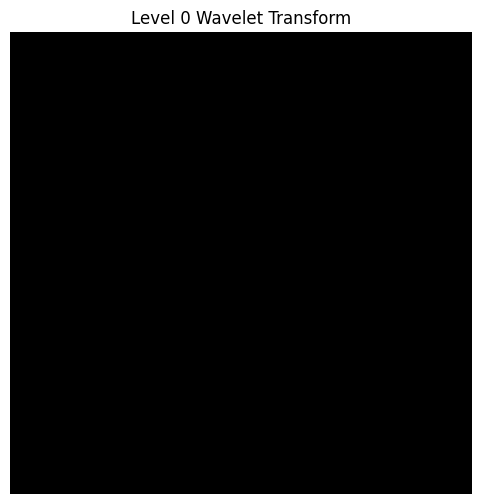

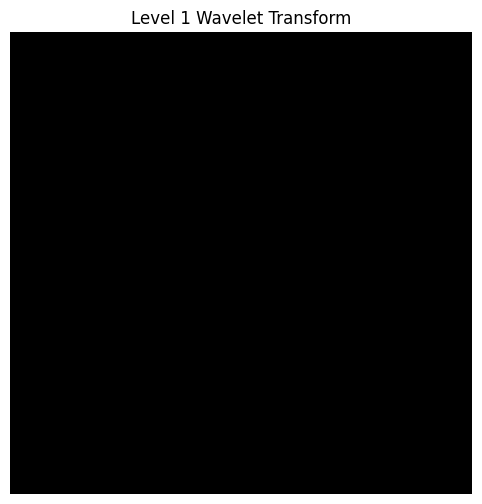

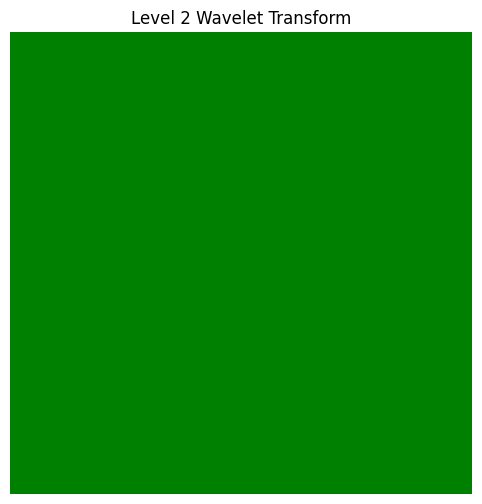

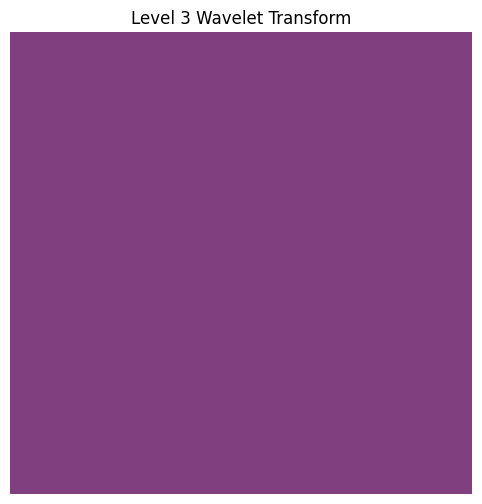

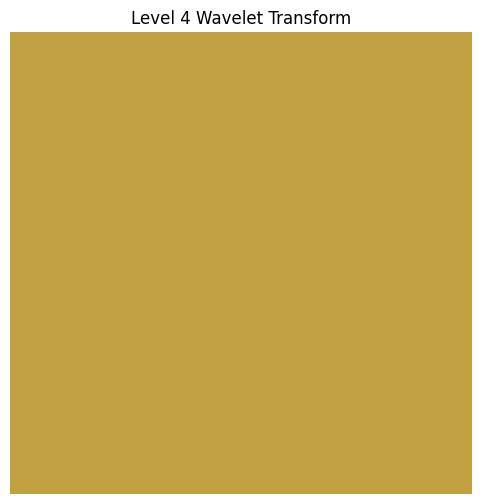

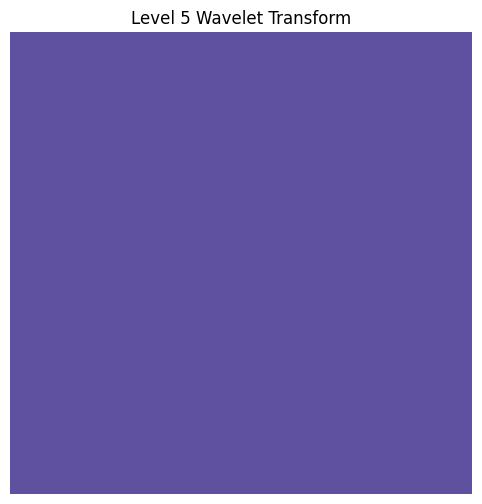

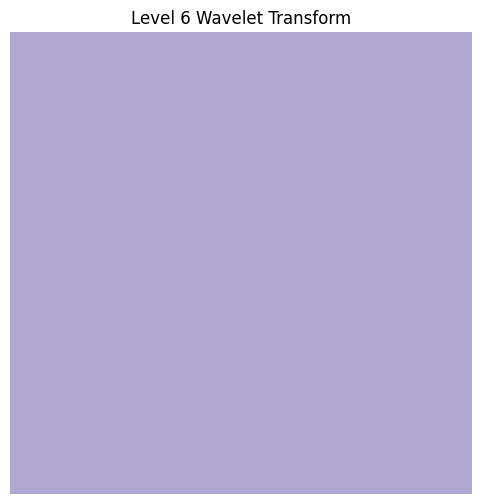

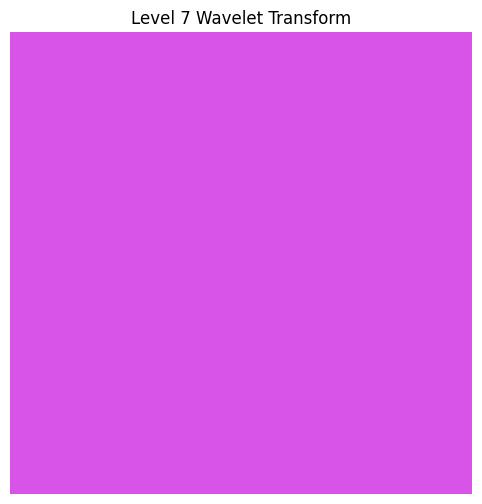

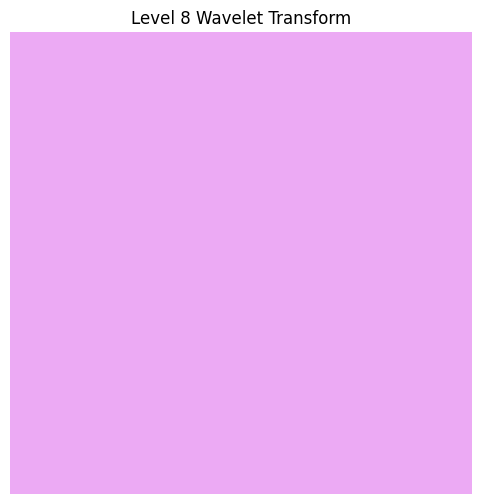

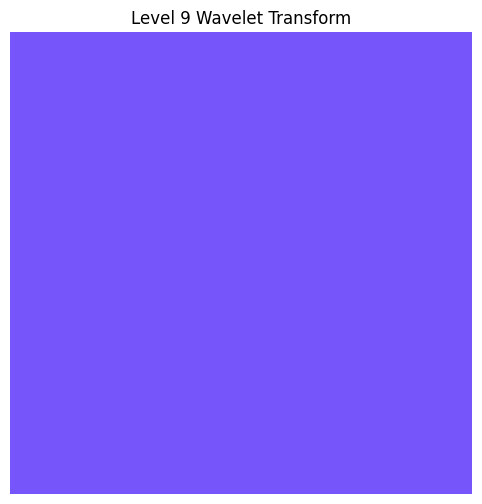

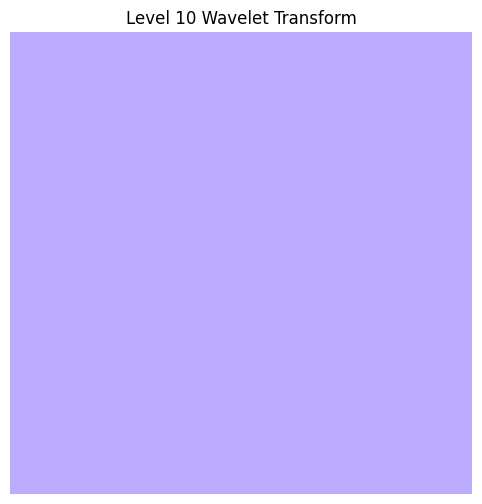

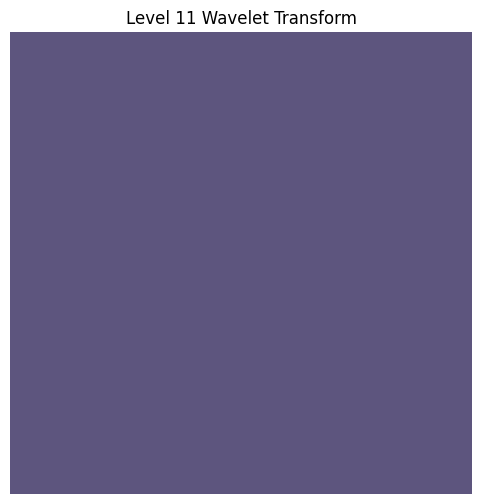

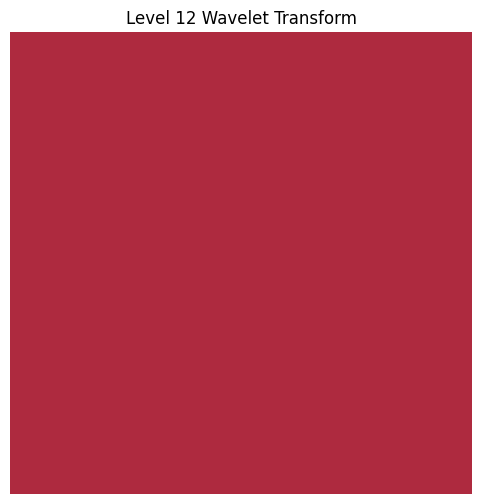

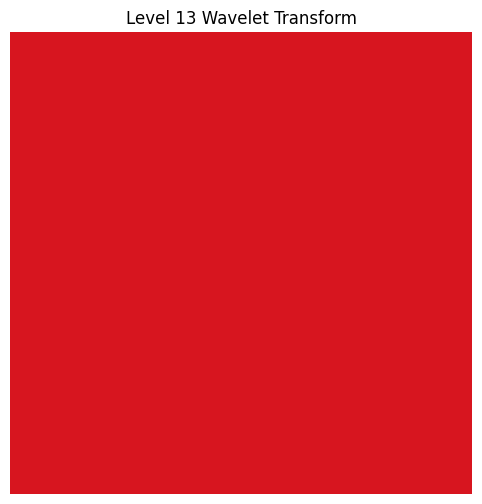

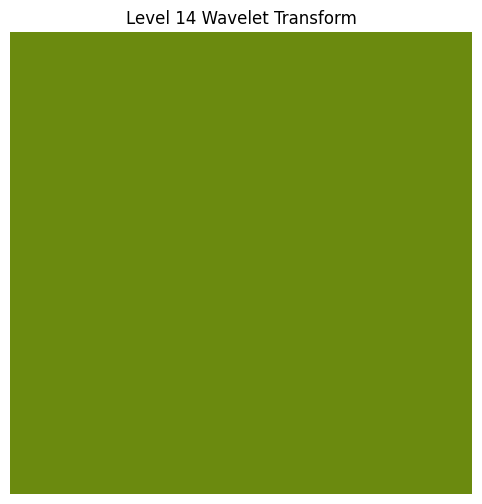

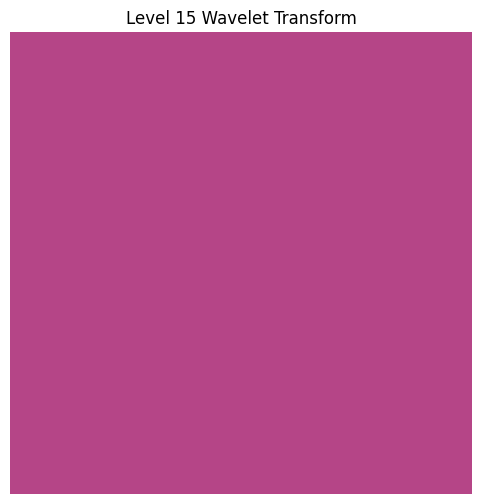

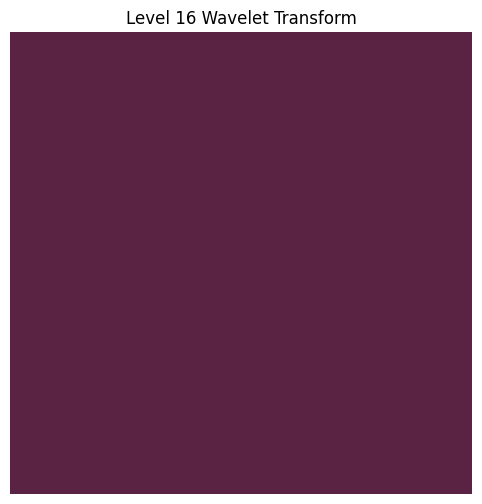

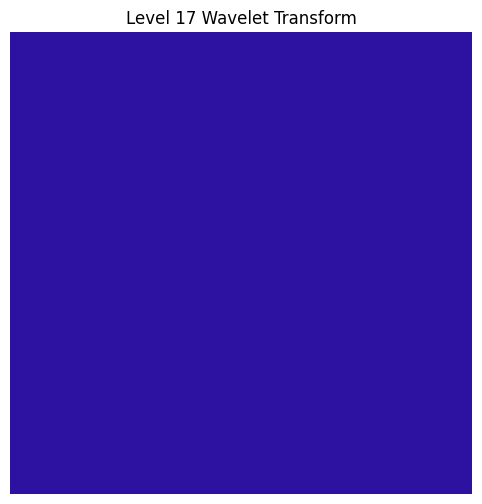

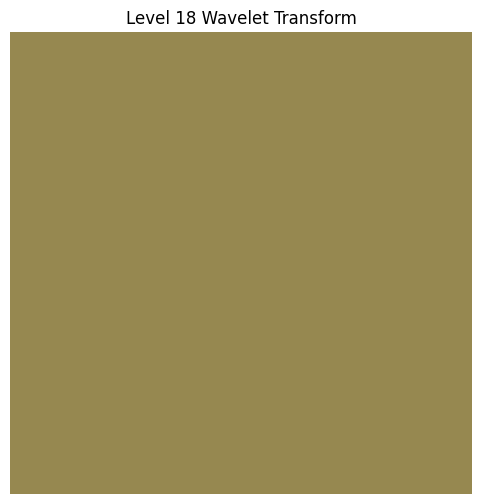

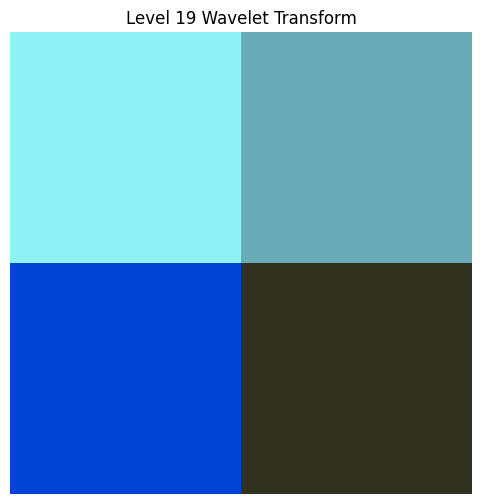

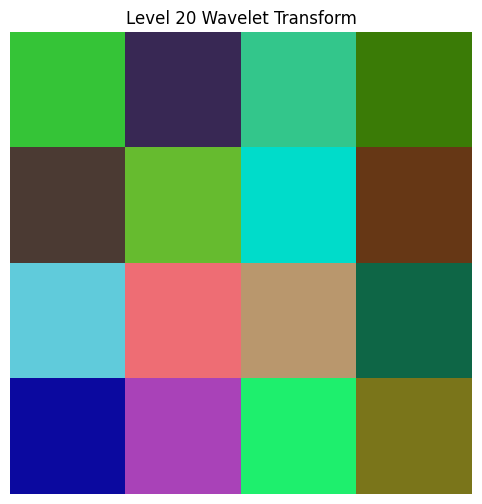

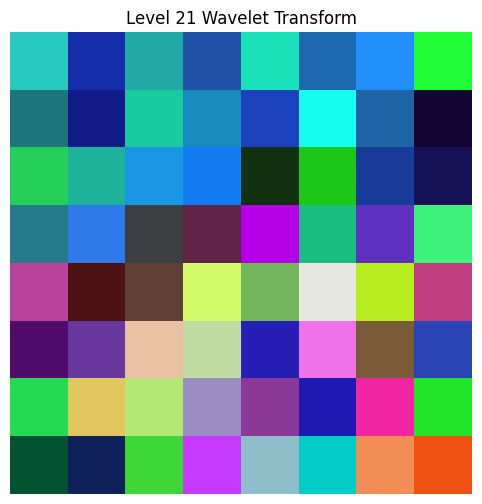

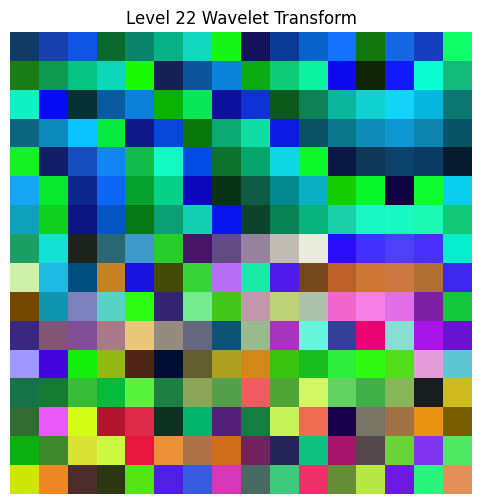

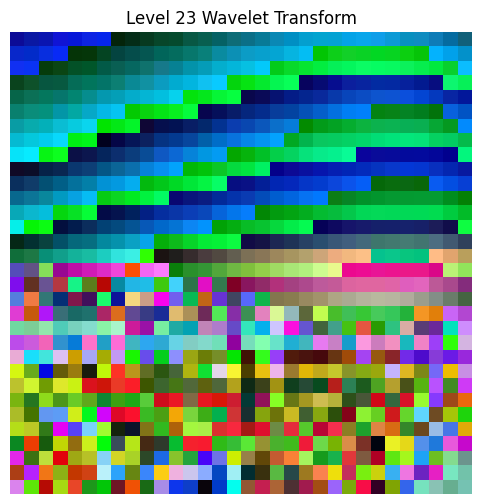

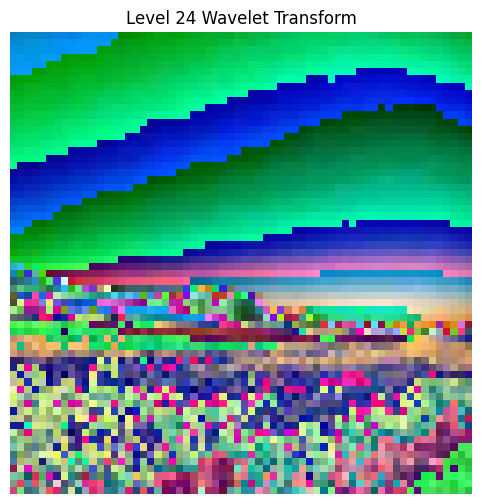

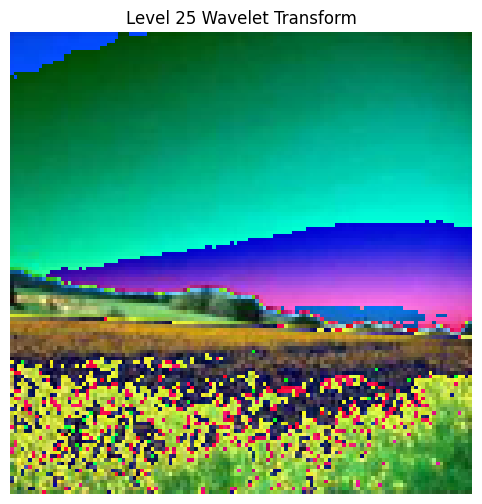

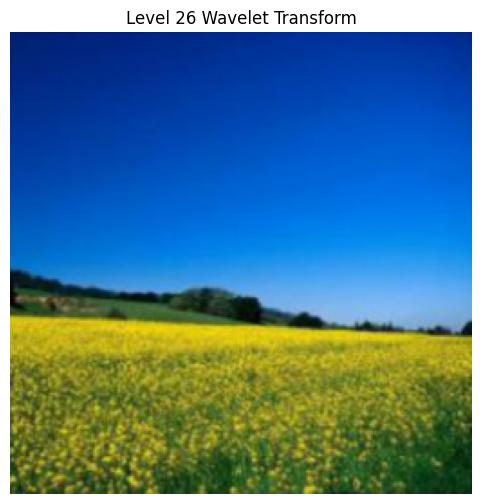

In [ ]:
### import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = payload_img

# Convert the image to float32 for wavelet transform
image = np.float32(image)

# Split the image into RGB channels
r, g, b = cv2.split(image)

# Apply wavelet transform to each channel
n_levels = 26  # Change this to the desired number of levels
coeffs_r = pywt.wavedec2(r, 'haar', level=n_levels)
coeffs_g = pywt.wavedec2(g, 'haar', level=n_levels)
coeffs_b = pywt.wavedec2(b, 'haar', level=n_levels)

# Display the coefficients at each level
for i in range(n_levels + 1):
    # Reconstruct each channel using the coefficients
    reconstructed_r = pywt.waverec2(coeffs_r[:i+1], 'haar')
    reconstructed_g = pywt.waverec2(coeffs_g[:i+1], 'haar')
    reconstructed_b = pywt.waverec2(coeffs_b[:i+1], 'haar')

    # Merge the channels back together
    reconstructed_image = cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b))

    # Display the reconstructed image at each level
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(np.uint8(reconstructed_image), cv2.COLOR_BGR2RGB))
    plt.title(f"Level {i} Wavelet Transform")
    plt.axis('off')
    plt.show()
